In [1]:
f = open("data/0000000000.txt", "r")
l=[]
for x in f:
    a=x.split()
    l.append(a)
    print(a)

['49.014469305055', '8.4323954473023', '116.43120574951', '0.013512', '0.007208', '-3.0025129803847', '-1.2424467338666', '-8.5325182699632', '8.6225009735591', '-0.023377717262865', '-0.14317006071049', '-0.041490794905849', '-0.20837820539826', '9.093745089874', '0.058055375869602', '-0.3200438466906', '9.0900592561877', '0.023343899978178', '-0.070017406558051', '-0.049960205878114', '0.022763740077163', '-0.069408036450491', '-0.051115285263642', '0.032202484376209', '0.015', '4', '9', '6', '6', '0']


In [12]:
la=[]
lo=[]
a1=[]
b=[]
c=[]
for i in range(77):
    x=str(i)
    s='0'*(10-len(x))+x+'.txt'
    f=open("data/"+s, "r")
    for x in f:
        a=x.split()
        la.append(float(a[0]))
        lo.append(float(a[1]))
        a1.append(float(a[3]))
        b.append(float(a[4]))
        c.append(float(a[5]))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

In [4]:
d=pd.DataFrame([np.array(la),np.array(lo),np.array(a1),np.array(b),np.array(c)])

In [5]:
d=d.T

In [13]:
d.head()

,Lat,Lon,roll,pitch,yaw
0,49.014469,8.432395,0.013512,0.007208,-3.002513
1,49.014468,8.432384,0.013787,0.002210,-3.006468
2,49.014467,8.432371,0.012623,0.006346,-3.010004
3,49.014466,8.432359,0.007931,0.013213,-3.012732
4,49.014465,8.432347,0.008191,0.013948,-3.015371


In [7]:
d.rename(columns = {0: 'Lat', 1: 'Lon',2:'roll',3:'pitch',4:'yaw'}, inplace = True)

In [8]:
d.head()

,Lat,Lon,roll,pitch,yaw
0,49.014469,8.432395,0.013512,0.007208,-3.002513
1,49.014468,8.432384,0.013787,0.002210,-3.006468
2,49.014467,8.432371,0.012623,0.006346,-3.010004
3,49.014466,8.432359,0.007931,0.013213,-3.012732
4,49.014465,8.432347,0.008191,0.013948,-3.015371


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lat     77 non-null     float64
 1   Lon     77 non-null     float64
 2   roll    77 non-null     float64
 3   pitch   77 non-null     float64
 4   yaw     77 non-null     float64
dtypes: float64(5)
memory usage: 3.1 KB


In [10]:
import math
def an(lat1,lo1):
    lat2=16.52638889
    lo2=80.64527778
    dlo=lo2-lo1
    y=math.sin(dlo)*math.cos(lat2)
    x=math.cos(lat1)*math.sin(lat2)-math.sin(lat1)*math.cos(lat2)*math.cos(dlo)
    z = math.atan2(y, x)
    z = math.degrees(z)
    z = (z + 360) % 360
    return int(z)

In [11]:
import math
def an1(lat1,lo1,lat2,lo2):
    dlo=lo2-lo1
    y=math.sin(dlo)*math.cos(lat2)
    x=math.cos(lat1)*math.sin(lat2)-math.sin(lat1)*math.cos(lat2)*math.cos(dlo)
    z = math.atan2(y, x)
    z = math.degrees(z)
    z = (z + 360) % 360
    return int(z)

In [12]:
def vector_calc(lat, long, ht):
    '''
    Calculates the vector from a specified point on the Earth's surface to the North Pole.
    '''
    a = 6378137.0  # Equatorial radius of the Earth
    b = 6356752.314245  # Polar radius of the Earth

    e_squared = 1 - ((b ** 2) / (a ** 2))  # e is the eccentricity of the Earth
    n_phi = a / (np.sqrt(1 - (e_squared * (np.sin(lat) ** 2))))

    x = (n_phi + ht) * np.cos(lat) * np.cos(long)
    y = (n_phi + ht) * np.cos(lat) * np.sin(long)
    z = ((((b ** 2) / (a ** 2)) * n_phi) + ht) * np.sin(lat)

    x_npole = 0.0
    y_npole = 6378137.0
    z_npole = 0.0

    v = ((x_npole - x), (y_npole - y), (z_npole - z))

    return v

In [13]:
def anc(lat2,long2, ht1=0, ht2=0):
    '''
    Calculates the angle between the vectors from 2 points to the North Pole.
    '''
    # Convert from degrees to radians
    lat1=16.52638889
    long1=80.64527778
    lat1_rad = (lat1 / 180) * np.pi
    long1_rad = (long1 / 180) * np.pi
    lat2_rad = (lat2 / 180) * np.pi
    long2_rad = (long2 / 180) * np.pi

    v1 = vector_calc(lat1_rad, long1_rad, ht1)
    v2 = vector_calc(lat2_rad, long2_rad, ht2)

    # The angle between two vectors, vect1 and vect2 is given by:
    # arccos[vect1.vect2 / |vect1||vect2|]
    dot = np.dot(v1, v2)  # The dot product of the two vectors
    v1_mag = np.linalg.norm(v1)  # The magnitude of the vector v1
    v2_mag = np.linalg.norm(v2)  # The magnitude of the vector v2

    theta_rad = np.arccos(dot / (v1_mag * v2_mag))
    # Convert radians back to degrees
    theta = (theta_rad / np.pi) * 180

    return theta

In [14]:
def anc1(lat1,long1,lat2,long2, ht1=0, ht2=0):
    '''
    Calculates the angle between the vectors from 2 points to the North Pole.
    '''
    # Convert from degrees to radians
    lat1_rad = (lat1 / 180) * np.pi
    long1_rad = (long1 / 180) * np.pi
    lat2_rad = (lat2 / 180) * np.pi
    long2_rad = (long2 / 180) * np.pi

    v1 = vector_calc(lat1_rad, long1_rad, ht1)
    v2 = vector_calc(lat2_rad, long2_rad, ht2)

    # The angle between two vectors, vect1 and vect2 is given by:
    # arccos[vect1.vect2 / |vect1||vect2|]
    dot = np.dot(v1, v2)  # The dot product of the two vectors
    v1_mag = np.linalg.norm(v1)  # The magnitude of the vector v1
    v2_mag = np.linalg.norm(v2)  # The magnitude of the vector v2

    theta_rad = np.arccos(dot / (v1_mag * v2_mag))
    # Convert radians back to degrees
    theta = (theta_rad / np.pi) * 180

    return theta

In [15]:
zan=[]
for i in range(len(d)):
    zan.append(an(d['Lat'][i],d['Lon'][i]))

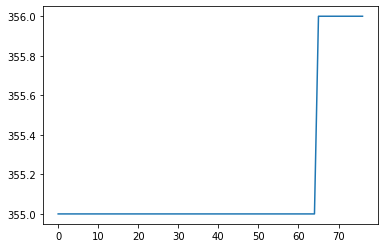

In [16]:
plt.plot(zan)

In [17]:
zanc=[]
for i in range(len(d)):
    zanc.append(anc(d['Lat'][i],d['Lon'][i]))

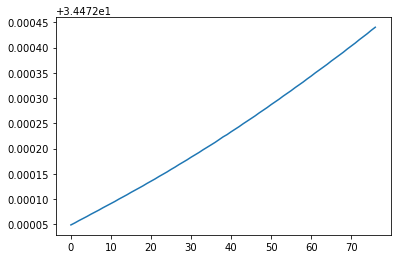

In [18]:
plt.plot(zanc)

In [19]:
z1=[]
i=0
while(i<len(d)-1):
    z1.append(an1(d['Lat'][i],d['Lon'][i],d['Lat'][i+1],d['Lon'][i+1]))
    i=i+1

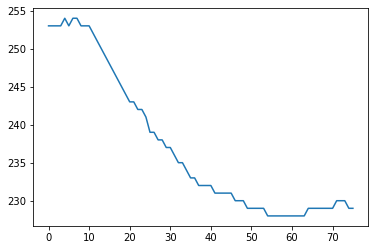

In [20]:
plt.plot(z1)

In [21]:
z2=[]
i=0
while(i<len(d)-2):
    z2.append(an1(d['Lat'][i],d['Lon'][i],d['Lat'][i+2],d['Lon'][i+2]))
    i=i+2

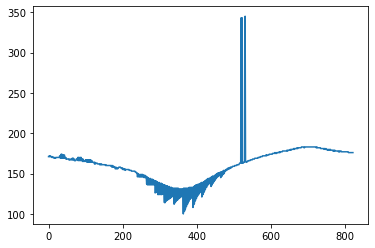

In [22]:
plt.plot(z2)

In [23]:
z1=[]
i=0
while(i<len(d)-1):
    z1.append(anc1(d['Lat'][i],d['Lon'][i],d['Lat'][i+1],d['Lon'][i+1]))
    i=i+1

<ipython-input-14-d1c3af7e86b5>:20: RuntimeWarning: invalid value encountered in arccos
  theta_rad = np.arccos(dot / (v1_mag * v2_mag))


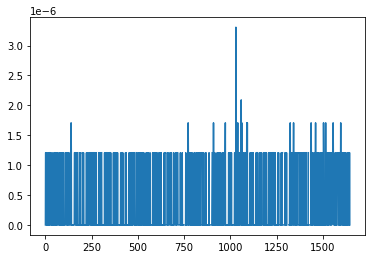

In [24]:
plt.plot(z1)

In [25]:
import math
 
def ga(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang

In [26]:
a=[]
i=0
while(i<len(d)-3):
    x=(ga((d['Lat'][i],d['Lon'][i]),(d['Lat'][i+1],d['Lon'][i+1]),(d['Lat'][i+2],d['Lon'][i+2])))
    x=min(x,360-x)
    a.append(x)
    i=i+3

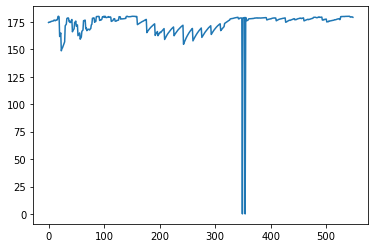

In [27]:
plt.plot(a)

In [28]:
d['angle']=np.array(zanc)

In [29]:
d.head()

,Lat,Lon,roll,pitch,yaw,angle
0,49.011227,8.422878,0.025982,-0.013047,-1.287962,34.475827
1,49.011226,8.422878,0.026346,-0.013242,-1.286318,34.475827
2,49.011226,8.422878,0.026712,-0.013469,-1.284915,34.475827
3,49.011226,8.422878,0.027125,-0.013598,-1.283393,34.475827
4,49.011225,8.422879,0.027577,-0.013621,-1.281920,34.475827


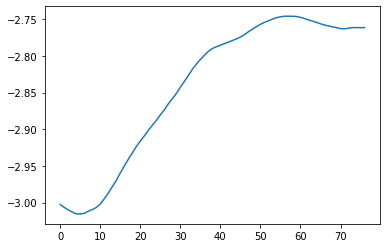

In [21]:
plt.plot(d['yaw'])

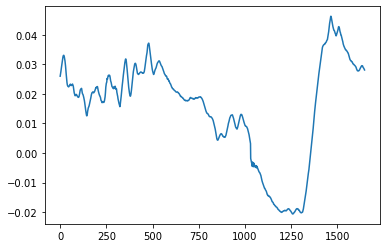

In [31]:
plt.plot(d['roll'])

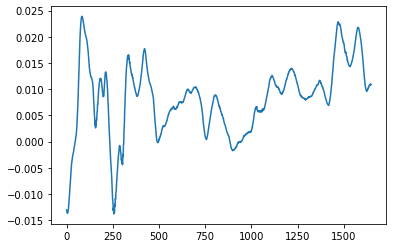

In [32]:
plt.plot(d['pitch'])

In [33]:
z2=[]
i=0
while(i<len(d)-2):
    z2.append(an(d['Lat'][i],d['Lon'][i],d['Lat'][i+2],d['Lon'][i+2]))
    i=i+2

TypeError: an() takes 2 positional arguments but 4 were given

In [ ]:
z1=np.array(z1)
len(z1)

In [ ]:
plt.plot(z1)

In [ ]:
np.argmax(z1)
max(z1)

In [ ]:
for i in range(605,1114):
    print(z1[i])

In [ ]:
x=z1
n=len(z1)

In [ ]:
np.argmax(z1)

In [ ]:
x=[]
for i in range(0,len(z1),2):
    x.append(z1[i])
n=len(x)
n

In [ ]:
z1[1000]

In [ ]:
for i in range(614,1061):
    print(z1[i])

In [ ]:
plt.plot(x)

In [ ]:
#increasing order
def inx(x,i):
    s=0
    r=0
    v=0
    k=6
    l=3
    if(i+k>=n):
        k=n-i-1
    if(i+l>=n):
        l=n-i-1
    for j in range(l):
        if(x[i+j]<x[i+j+1]):
            r=r+1
    for j in range(k):
        if(x[i+j]<=x[i+j+1]):
            #s=s+(x[i+j+1]-x[i+j])
            v=v+1
    #if(s<=15):
        #return 0
    #else:
    if(v==k or r==l):
        return 1
    return 0

In [ ]:
#decreasing order
def inx1(x,i):
    s=0
    r=0
    v=0
    k=6
    l=3
    if(i+k>=n):
        k=n-i-1
    if(i+l>=n):
        l=n-i-1
    for j in range(l):
        if(x[i+j]>x[i+j+1]):
            r=r+1
    for j in range(k):
        if(x[i+j]>=x[i+j+1]):
            #s=s+(x[i+j]-x[i+j-1])
            v=v+1
    #if(s<=15):
        #return 0
    #else:
    if(v==k or r==l):
        return 1
    return 0

In [ ]:
#complete version
s=x[0]
a=0
f=0
g=0
b=0
i=0
rt=[]
lt=[]
ru=[]
lu=[]
while(i<n-1):
    i=i+1
    y=abs(x[i]-s)
    y=(min(y,360-y))
    if(x[i-1]<=x[i] and g==0):
        if(f==0 and g==0):
            if(inx(x,i-1)):
                right=i-1
                #print("insr "+str(right))
                s=x[right]
                f=1
        if(y>=65 and y<=125):
            v=0
            k=10
            if(i+k>=n):
                k=n-i-1
            for j in range(k):
                if(x[i+j]<x[i+j+1]):
                    v=v+1
            if(v<k//2):
                j=i
                while(x[j]<x[j+1] and j<n):
                    j=j+1
                j=j+6
                f=0
                print('Right Turn',s,x[j],right,j)
                rt.append([right,j])
                s=x[j]
                i=j
                right=j
        if(y>=170 and y<=190):
            j=i
            while(x[j]<x[j+1] and j<n):
                j=j+1
            j=j+6
            f=0
            print("RU",s,x[j],right,j)
            ru.append([right,j])
            s=x[j]
            i=j
            right=j
    elif(x[i-1]>=x[i] and f==0):
        if(f==0 and g==0):
            if(inx1(x,i-1)):
                #print("insl "+str(i-1))
                left=i-1
                s=x[left]
                g=1
        if(y>=65 and y<=125):
            v=0
            k=10
            if(i+k>=n):
                k=n-i-1
            for j in range(k):
                if(x[i+j]>x[i+j+1]):
                    v=v+1
            if(v<k//2):
                j=i
                while(x[j]>x[j+1] and j<n):
                    j=j+1
                j=j+6
                g=0
                print('Left Turn',s,x[j],left,j)
                lt.append([left,j])
                s=x[j]
                i=j
                left=j
        if(y>=170 and y<=190):
            j=i
            while(x[j]>x[j+1] and j<n):
                j=j+1
            j=j+6
            g=0
            print("LU",s,x[j],left,j)
            rt.append([left,j])
            s=x[j]
            i=j
            left=j

In [ ]:
x[72],x[526]

In [ ]:
for i in range(95,102):
    #if(inx1(x,i)):
        #print('1')
    print(x[i])

In [ ]:
z=np.array(z)
d['angle']=z

In [ ]:
d.head()

In [ ]:
d['angle'].value_counts()

In [ ]:
d['angle']

In [ ]:
plt.plot(d['angle'])

In [ ]:
l=[]
for i in range(len(d)-1):
    l.append(abs(d['angle'][i]-d['angle'][i+1])*(10**9))

In [ ]:
d['angle'][0]-d['angle'][1]

In [ ]:
plt.plot(l)

In [ ]:
d['angle']

In [ ]:
plt.plot(d['Lat'])

In [ ]:
plt.plot(d['Lon'])

In [ ]:
a

In [ ]:
a=np.array(a)

In [ ]:
plt.plot(a)

In [ ]:
d.head()

In [11]:
from arcgis.geocoding import reverse_geocode
from arcgis.geometry import Geometry
from arcgis.gis import GIS
import pandas as pd

In [14]:
gis = GIS("http://www.arcgis.com", "pramya96", "Pramya@9966")

def get_zip(df, lon_field, lat_field):
    location = reverse_geocode((Geometry({"x":float(df[lon_field]), "y":float(df[lat_field]), "spatialReference":{"wkid": 4326}})))
    return location['address']

zipcodes = d.apply(get_zip, axis=1, lat_field='Lat', lon_field='Lon')